<a href="https://colab.research.google.com/github/ahatesham02/Artificial_Neural_Network-ANN-/blob/main/Bank_turnover_dataset_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction with Artificial Neural Network(ANN) with Bank Turnover dataset.

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns # for data visualization
sns.set(style="whitegrid", color_codes=True)
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [ ]:
df= pd.read_csv('Churn_Modelling.csv') # load and read csv files into dataframe
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5036,5037,15805429,Murray,699,Germany,Male,59,3,106819.65,1,0,1,163570.25,0
4566,4567,15580682,Tsai,652,France,Female,40,4,79927.36,2,1,1,33524.60,0
8983,8984,15783025,Piazza,723,Germany,Male,37,3,94661.53,2,1,0,121239.65,0
8751,8752,15635531,Boag,575,Spain,Female,30,8,0.00,2,1,0,185341.63,0
4079,4080,15694601,Ankudinov,583,France,Female,31,4,158978.79,1,1,0,12538.92,0


## Data preprocesing and cleaning

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.drop(['RowNumber','CustomerId','Surname'], axis='columns', inplace=True)

'RowNumber', CustomerId', 'Surname' these 3 columns are not necessary for churn prediction.So using 'drop' function we deletes these columns.


In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.isnull().sum() # check is there any missing value

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Data Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

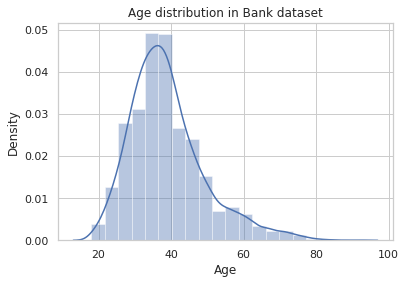

In [ ]:
sns.distplot(df['Age'],bins=20 ) # distribution of age data
plt.title('Age distribution in Bank dataset')
plt.xlabel('Age')
plt.ylabel('Density')

In [ ]:
# check object type column unique values
for i in df:
  if df[i].dtype == 'object':

    print(i +':',df[i].unique())

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


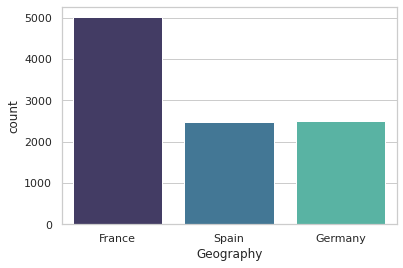

In [ ]:
sns.countplot(df['Geography'], data=df, palette='mako')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


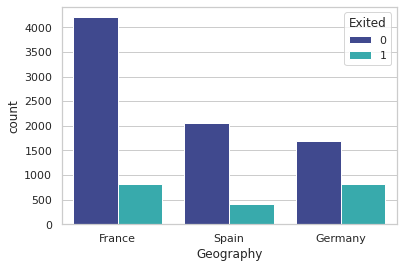

In [ ]:
sns.countplot(df['Geography'],hue='Exited', data=df, palette='mako', saturation=1.0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


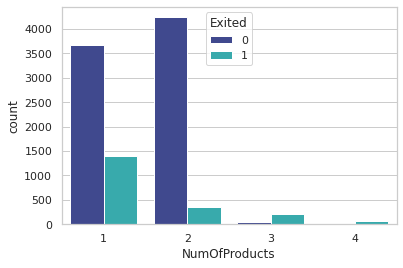

In [ ]:
sns.countplot(df['NumOfProducts'], data=df, hue='Exited', palette='mako', saturation=1.00)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


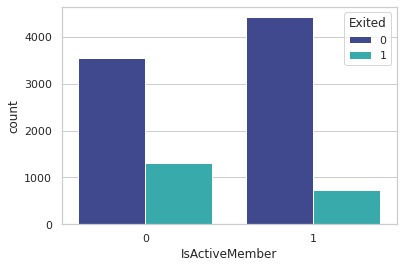

In [ ]:
sns.countplot(df['IsActiveMember'], data=df, hue='Exited', palette='mako', saturation=1.00)

## Data transformation and one hot encoding

In [ ]:
# Transform categorical data into numerical data
df['Gender'].replace({'Male':1,'Female':0}, inplace= True) # replacing object type data into numeric data

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df1= pd.get_dummies(data= df, columns=['Geography']) # one hot encoding using dummy variables
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
df1.drop(['Geography_Spain'], axis='columns', inplace=True) # drop unnecessary column after encoding
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0


In [ ]:
# Data Scalling witk sklearn
col_to_scale= ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df1[col_to_scale]= scaler.fit_transform(df1[col_to_scale])

In [ ]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0


## Train Test Split

In [ ]:
X= df1.drop(['Exited'], axis='columns')
y= df1['Exited']

In [ ]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1,0
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,0
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1,0
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,1,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, x_test,y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state= 32)

In [ ]:
X_train.shape

(8000, 11)

## ANN Model

In [ ]:
model = keras.Sequential([
                        keras.layers.Dense(100, input_shape=(11,), activation='relu'),
                        keras.layers.Dense(75, activation='relu'),
                        keras.layers.Dense(1, activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train, epochs=150)

Epoch 1/150
250/250 [==============================] - 1s 1ms/step - loss: 0.4822 - accuracy: 0.8037
Epoch 2/150
250/250 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8233
Epoch 3/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8325
Epoch 4/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3705 - accuracy: 0.8461
Epoch 5/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8515
Epoch 6/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.8576
Epoch 7/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3415 - accuracy: 0.8592
Epoch 8/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8526
Epoch 9/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3405 - accuracy: 0.8634
Epoch 10/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3382 - accura

In [ ]:
model.evaluate(x_test,y_test) # evaluate model

63/63 [==============================] - 0s 964us/step - loss: 0.4655 - accuracy: 0.8305


[0.4655376672744751, 0.8305000066757202]

Model Accuracy : 84.05%

In [ ]:
y_predicted= model.predict(x_test)

In [ ]:
y_predicted[:10]

array([[7.2453320e-03],
       [4.8613659e-01],
       [5.6914777e-02],
       [4.6168298e-02],
       [3.7818849e-03],
       [9.0086460e-04],
       [1.8244773e-02],
       [1.0000000e+00],
       [1.5465170e-02],
       [6.0165823e-03]], dtype=float32)

In [ ]:
y_test[:10]

5097    0
2580    1
260     0
6781    0
5468    0
3977    0
2834    0
4014    1
6224    0
8001    0
Name: Exited, dtype: int64

In [ ]:
# converting predicted output to binary data with threshold
y_pred=[]
for i in y_predicted:
  if i>= 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1583
           1       0.62      0.50      0.55       417

    accuracy                           0.83      2000
   macro avg       0.74      0.71      0.72      2000
weighted avg       0.82      0.83      0.82      2000



The confusion matrix for the model test prediction results is shown below

Text(0.5, 1.0, 'Confusion Matrix')

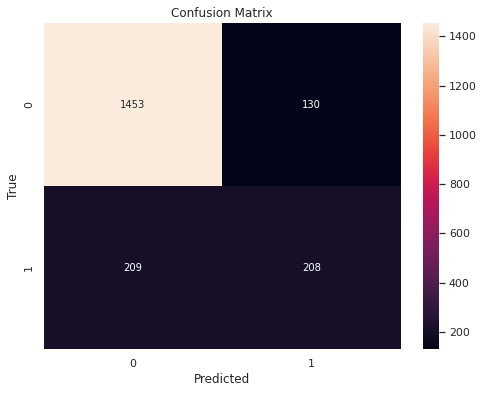

In [ ]:
data= tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(data, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')